<a href="https://colab.research.google.com/github/Vykhrystenko/NM_FIT_2_9_Vykhrystenko/blob/main/%D0%9B%D0%A0_%E2%84%9611_%D0%92%D0%B8%D1%85%D1%80%D0%B8%D1%81%D1%82%D0%B5%D0%BD%D0%BA%D0%BE_%D0%923_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вихристенко Владислав. Варіант 3

Метод найменших квадратів (МНК)

1. Приклад 1.Наближення прямою.
Реалізація метода вручну

x= [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y= [-0.00452324 -0.01634777 -0.03315594 -0.05294611 -0.07396043 -0.09463884
 -0.11358944 -0.12956943 -0.14147302 -0.1483238 ]
Рівняння лінії: y = -0.17x + 0.01


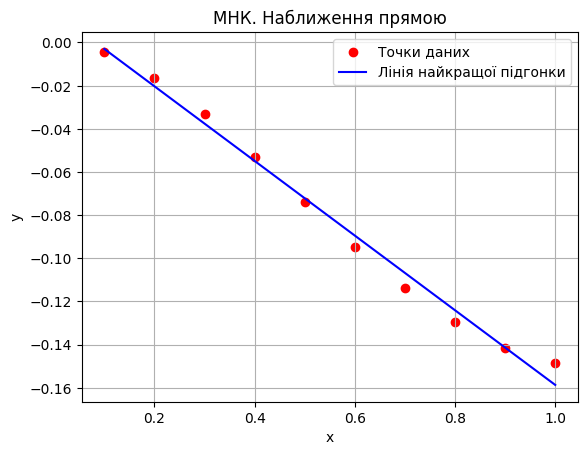

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return np.log(x + 1) - np.sin(x)

# Вхідні дані
x = np.array([i * 0.1 for i in range(1, 11)])
y = np.array([func(xi) for xi in x])

print('x=', x)
print('y=', y)

# Обчислення коефіцієнтів a та b для лінії y = ax + b
n = len(x)
x_mean = np.mean(x)
y_mean = np.mean(y)

a = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x**2) - np.sum(x)**2)
b = y_mean - a * x_mean

# Виведення результатів
print(f"Рівняння лінії: y = {a:.2f}x + {b:.2f}")

# Побудова графіка
plt.scatter(x, y, color='red', label='Точки даних')
plt.plot(x, a * x + b, color='blue', label='Лінія найкращої підгонки')

plt.xlabel('x')
plt.ylabel('y')
plt.title('МНК. Наближення прямою')
plt.legend()
plt.grid(True)
plt.show()


Приклад 2. Реалізація МНК наближення прямою за допомогою polyfit()

x= [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y= [-0.00452324 -0.01634777 -0.03315594 -0.05294611 -0.07396043 -0.09463884
 -0.11358944 -0.12956943 -0.14147302 -0.1483238 ]
Рівняння лінії: y = -0.17x + 0.01


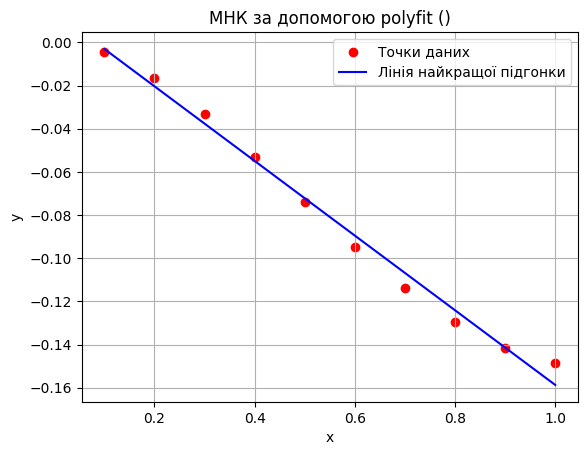

In [5]:
import numpy as np
import matplotlib.pyplot as plt


x = np.array([i * 0.1 for i in range(1, 11)])
y = np.array([func(xi) for xi in x])

print('x=', x)
print('y=', y)

# Використання polyfit для знаходження коефіцієнтів лінії (1 - це ступінь полінома, тобто лінія)
coefficients = np.polyfit(x, y, 1)

# Виведення результатів
a, b = coefficients
print(f"Рівняння лінії: y = {a:.2f}x + {b:.2f}")

# Створення поліноміальної функції для отриманих коефіцієнтів
polynomial = np.poly1d(coefficients)

# Побудова графіка
plt.scatter(x, y, color='red', label='Точки даних')
x_line = np.linspace(min(x), max(x), 100)  # Точки для побудови гладкої лінії
plt.plot(x_line, polynomial(x_line), color='blue', label='Лінія найкращої підгонки')

plt.title('МНК за допомогою polyfit ()')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Приклад 3  Реалізація МНК наближення параболою за допомогою polyfit()

x= [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y= [-0.00452324 -0.01634777 -0.03315594 -0.05294611 -0.07396043 -0.09463884
 -0.11358944 -0.12956943 -0.14147302 -0.1483238 ]
Рівняння параболи: y = 0.04x^2 + -0.22x + 0.02


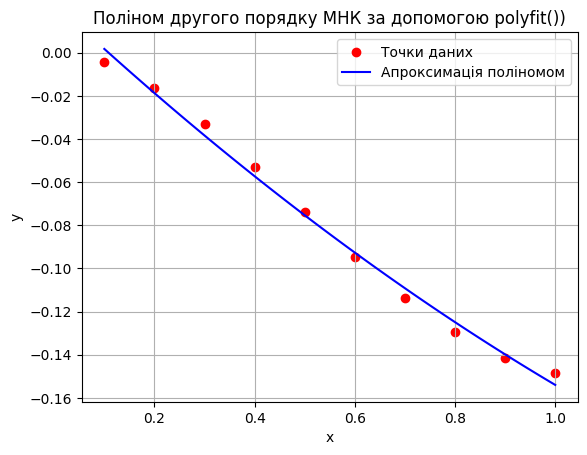

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([i * 0.1 for i in range(1, 11)])
y = np.array([func(xi) for xi in x])

print('x=', x)
print('y=', y)

# Використання polyfit для знаходження коефіцієнтів полінома другого порядку (ступінь 2)
coefficients = np.polyfit(x, y, 2)

# Виведення результатів
a, b, c = coefficients  # Тепер три коефіцієнти: для x^2, x та вільного члена
print(f"Рівняння параболи: y = {a:.2f}x^2 + {b:.2f}x + {c:.2f}")

# Створення поліноміальної функції для отриманих коефіцієнтів
polynomial = np.poly1d(coefficients)

# Побудова графіка
plt.scatter(x, y, color='red', label='Точки даних')
x_line = np.linspace(min(x), max(x), 100)
plt.plot(x_line, polynomial(x_line), color='blue', label='Апроксимація поліномом')

plt.title('Поліном другого порядку МНК за допомогою polyfit())')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Приклад 4. Наближення параболою за допомогою least_squares ()

x= [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y= [-0.00452324 -0.01634777 -0.03315594 -0.05294611 -0.07396043 -0.09463884
 -0.11358944 -0.12956943 -0.14147302 -0.1483238 ]
a0 = 0.02, a1 = -0.22, a2 = 0.04


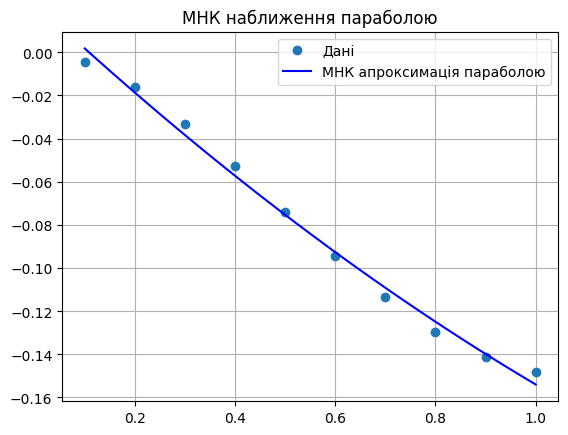

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares


def func(x):
    return np.log(x + 1) - np.sin(x)

# Вхідні дані
x = np.array([i * 0.1 for i in range(1, 11)])
y = np.array([func(xi) for xi in x])

print('x=', x)
print('y=', y)

# Функція для мінімізації
def fun(a, x, y):
    return a[0] + a[1] * x + a[2] * x**2 - y

# Початкові наближення коефіцієнтів полінома
a0 = np.array([1, 1, 1])

# Використовуємо least_squares для знаходження оптимальних параметрів
res_lsq = least_squares(fun, x0=a0, args=(x, y))

# Виведення коефіцієнтів поліному
print("a0 = %.2f, a1 = %.2f, a2 = %.2f" % tuple(res_lsq.x))

# Функція апроксимації з отриманими коефіцієнтами
def f(x):
    return res_lsq.x[0] + res_lsq.x[1] * x + res_lsq.x[2] * x**2

# Побудова графіка
x_p = np.linspace(min(x), max(x), 100)  # Точки для графіка апроксимованої функції
y_p = f(x_p)

# Графік
plt.plot(x, y, 'o', label='Дані')
plt.plot(x_p, y_p, 'b', label='МНК апроксимація параболою')
plt.title("МНК наближення параболою")
plt.legend()
plt.grid(True)
plt.show()